In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('INR=X.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0
261,2021-01-26,72.970001,73.222000,72.774498,72.970001,72.970001,0


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1.shape

(262,)

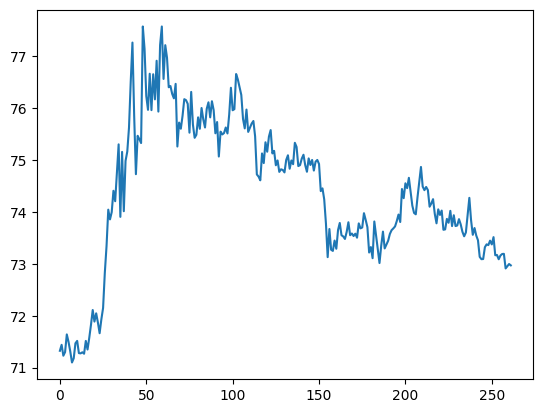

In [ ]:
plt.plot(df1)

In [ ]:
import seaborn as sns

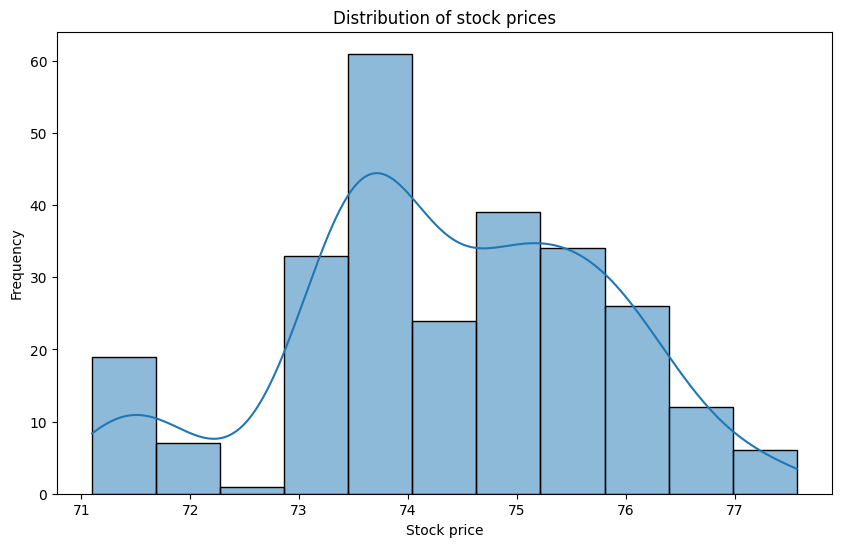

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Close'],kde=True)
plt.xlabel('Stock price')
plt.ylabel('Frequency')
plt.title('Distribution of stock prices')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.03477572],
       [0.05255083],
       [0.02015486],
       [0.03091266],
       [0.08346226],
       [0.06128282],
       [0.0330918 ],
       [0.        ],
       [0.01236507],
       [0.05718746],
       [0.06422023],
       [0.02782086],
       [0.02709443],
       [0.03032549],
       [0.02604373],
       [0.06411173],
       [0.03851606],
       [0.07341559],
       [0.11244216],
       [0.15610552],
       [0.12160815],
       [0.14632175],
       [0.11901156],
       [0.08707895],
       [0.12828466],
       [0.16228805],
       [0.26661491],
       [0.34652308],
       [0.45479198],
       [0.42582753],
       [0.44749631],
       [0.51097357],
       [0.47990773],
       [0.56568823],
       [0.64915049],
       [0.43338487],
       [0.62673876],
       [0.45013896],
       [0.60000043],
       [0.62746503],
       [0.69893379],
       [0.83554827],
       [0.95208688],
       [0.73346175],
       [0.56037123],
       [0.67465172],
       [0.66460629],
       [0.653

In [ ]:
df1.shape

(262, 1)

In [ ]:
training_size =int(len(df1)*0.60)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(157, 105)

In [ ]:
import numpy
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
   a=dataset[i:(i+time_step),0]
   dataX.append(a)
   dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [ ]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,ytest=create_dataset(test_data,time_step)

In [ ]:
print(X_train)

[[0.03477572 0.05255083 0.02015486 ... 0.68157722 0.73802172 0.81761969]
 [0.05255083 0.02015486 0.03091266 ... 0.73802172 0.81761969 0.75066499]
 [0.02015486 0.03091266 0.08346226 ... 0.81761969 0.75066499 0.75394088]
 ...
 [0.75100471 0.85780561 0.78307518 ... 0.59069549 0.51004683 0.51816074]
 [0.85780561 0.78307518 0.89799138 ... 0.51004683 0.51816074 0.485332  ]
 [0.78307518 0.89799138 0.74667705 ... 0.51816074 0.485332   0.41336927]]


In [ ]:
print(X_train.shape),print(y_train.shape)

(56, 100)
(56,)


(None, None)

In [ ]:
print(X_test.shape),print(ytest.shape)

(4, 100)
(4,)


(None, None)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

## let's create LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train[:100]

array([[[0.03477572],
        [0.05255083],
        [0.02015486],
        ...,
        [0.68157722],
        [0.73802172],
        [0.81761969]],

       [[0.05255083],
        [0.02015486],
        [0.03091266],
        ...,
        [0.73802172],
        [0.81761969],
        [0.75066499]],

       [[0.02015486],
        [0.03091266],
        [0.08346226],
        ...,
        [0.81761969],
        [0.75066499],
        [0.75394088]],

       ...,

       [[0.75100471],
        [0.85780561],
        [0.78307518],
        ...,
        [0.59069549],
        [0.51004683],
        [0.51816074]],

       [[0.85780561],
        [0.78307518],
        [0.89799138],
        ...,
        [0.51004683],
        [0.51816074],
        [0.485332  ]],

       [[0.78307518],
        [0.89799138],
        [0.74667705],
        ...,
        [0.51816074],
        [0.485332  ],
        [0.41336927]]])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.4239 - val_loss: 0.0516
Epoch 2/100
1/1 [==============================] - 0s 238ms/step - loss: 0.2762 - val_loss: 0.0207
Epoch 3/100
1/1 [==============================] - 0s 242ms/step - loss: 0.1567 - val_loss: 0.0023
Epoch 4/100
1/1 [==============================] - 0s 237ms/step - loss: 0.0615 - val_loss: 0.0061
Epoch 5/100
1/1 [==============================] - 0s 228ms/step - loss: 0.0086 - val_loss: 0.0469
Epoch 6/100
1/1 [==============================] - 0s 233ms/step - loss: 0.0309 - val_loss: 0.0805
Epoch 7/100
1/1 [==============================] - 0s 317ms/step - loss: 0.0678 - val_loss: 0.0721
Epoch 8/100
1/1 [==============================] - 0s 378ms/step - loss: 0.0549 - val_loss: 0.0469
Epoch 9/100
1/1 [==============================] - 0s 415ms/step - loss: 0.0264 - val_loss: 0.0248
Epoch 10/100
1/1 [==============================] - 0s 422ms/step - loss: 0.0090 - val_loss: 0.0112
Epoch 11/100

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 68ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

74.51191953600748

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

73.48993890542694

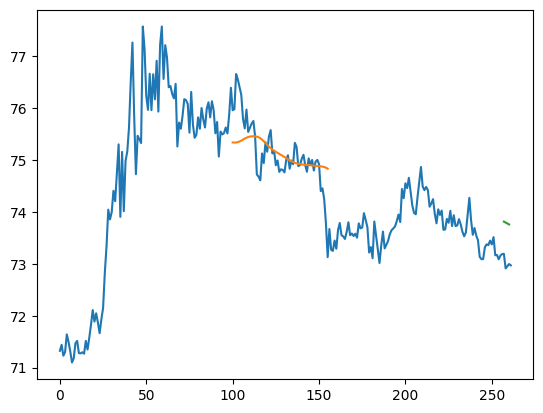

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test_data[5:].reshape(1,-1)

In [ ]:
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.4152701962070502,
 0.37867144399646335,
 0.37516217151092235,
 0.3676354350431428,
 0.38871703594527496,
 0.41731130840454256,
 0.3787787082600591,
 0.3838646417729077,
 0.3763213674431629,
 0.38327731583390623,
 0.37140637669045695,
 0.4139718967629378,
 0.39913527074643973,
 0.40174717102096835,
 0.4443584406929091,
 0.42426617487908125,
 0.40262800537001375,
 0.3272031446049031,
 0.34349371143934704,
 0.3104019133224387,
 0.41962954570957045,
 0.37751224806421924,
 0.33701751560509585,
 0.29595091315273336,
 0.34788273635773415,
 0.3894906060307246,
 0.3394444082088395,
 0.35100514652082104,
 0.3622570750364549,
 0.3825345030805245,
 0.3937403728777831,
 0.3989641734268403,
 0.40494624267504165,
 0.42085010174649184,
 0.4402632333034848,
 0.41808364201433257,
 0.5162292067297685,
 0.4890264330675631,
 0.5333075631197648,
 0.5188258056179897,
 0.5495522257952938,
 0.5069548664745405,
 0.466770334846883,
 0.44510017153008796,
 0.44098950819489957,
 0.4917468340813489,
 0.5363216271

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)


[0.404556]
101
1 day input [0.37867144 0.37516217 0.36763544 0.38871704 0.41731131 0.37877871
 0.38386464 0.37632137 0.38327732 0.37140638 0.4139719  0.39913527
 0.40174717 0.44435844 0.42426617 0.40262801 0.32720314 0.34349371
 0.31040191 0.41962955 0.37751225 0.33701752 0.29595091 0.34788274
 0.38949061 0.33944441 0.35100515 0.36225708 0.3825345  0.39374037
 0.39896417 0.40494624 0.4208501  0.44026323 0.41808364 0.51622921
 0.48902643 0.53330756 0.51882581 0.54955223 0.50695487 0.46677033
 0.44510017 0.44098951 0.49174683 0.53632163 0.58191636 0.52360154
 0.51284374 0.5223646  0.5131374  0.46361717 0.47332304 0.48607497
 0.44216401 0.4142042  0.45576493 0.43908874 0.45211763 0.39489957
 0.39607407 0.4273416  0.41581131 0.45131346 0.40593558 0.43817606
 0.40598164 0.407728   0.42658457 0.41109817 0.38896464 0.37554888
 0.38695537 0.4382232  0.48995333 0.423462   0.37987654 0.40015521
 0.37788257 0.36377114 0.31437471 0.30745045 0.30788321 0.34312231
 0.35159247 0.34930484 0.36259664 0

### lets predict for next 30 days

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

262

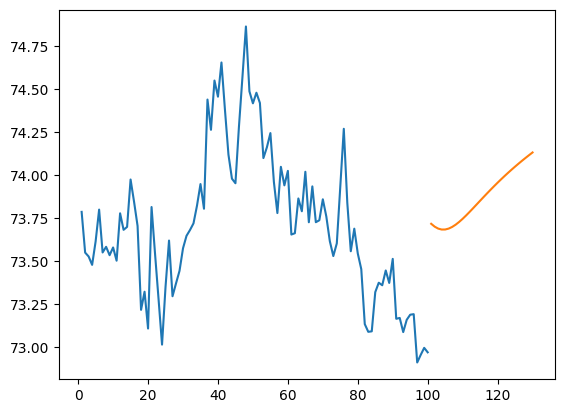

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[162:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

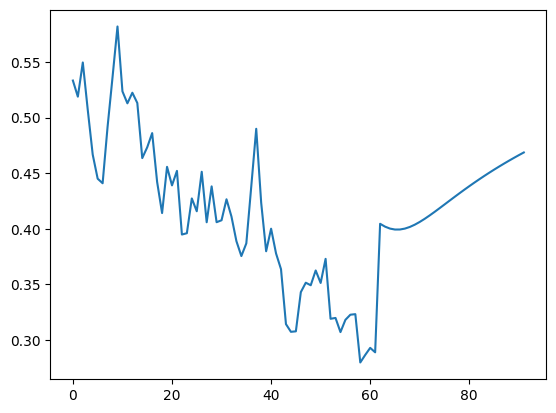

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[200:])